# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [21]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [7]:
#Read in data from source 
df_raw = pd.read_csv("../../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [38]:
total_observations = df_raw['admit'].count()+ df_raw['gpa'].count()+ df_raw['gre'].count()+ df_raw['prestige'].count()
print("Answer:", total_observations)


Answer: 1595


#### Question 2. Create a summary table

In [31]:
df_raw.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [32]:
df_raw.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


In [34]:
 df_raw.skew()


admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because GRE has a much greater variance than GPA 

#### Question 4. Drop data points with missing data


In [11]:

df=df_raw[df_raw['gpa'].notnull()]
df=df[df_raw['gre'].notnull()]

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


C:\Users\SarahLeck\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


 Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Because all variables have the same number of non-null entries

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1e7e2ae64e0>],
 'caps': [<matplotlib.lines.Line2D at 0x1e7e2afbeb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e7e2b0a780>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e7e2b048d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1e7e0f7ab00>,
  <matplotlib.lines.Line2D at 0x1e7e2afb6a0>]}

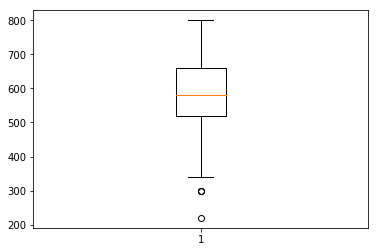

In [13]:
#boxplot 1
plt.boxplot(df['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x1e7e306fb38>],
 'caps': [<matplotlib.lines.Line2D at 0x1e7e3079eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e7e3087dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e7e307ff28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1e7e306fcf8>,
  <matplotlib.lines.Line2D at 0x1e7e3079cf8>]}

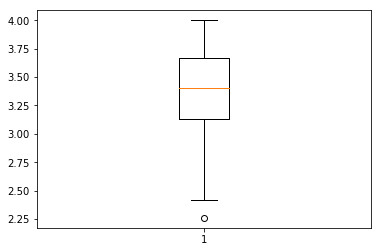

In [16]:
#boxplot 2 
plt.boxplot(df['gpa'])


#### Question 7. What do this plots show?

Answer: That there are a few outliers but not many, and that both variables look to have relatively normal distributions

#### Question 8. Describe each distribution 

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

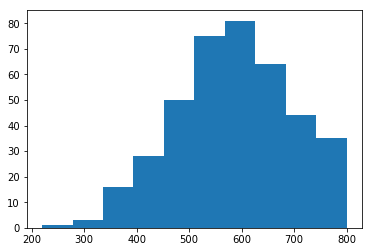

In [27]:
# plot the distribution of each variable 

plt.hist(df['gre'], bins =10)



(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

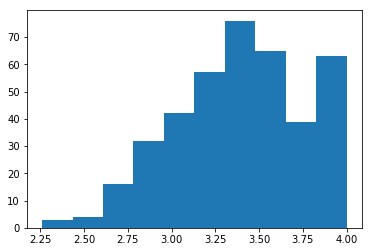

In [28]:
plt.hist(df['gpa'],bins=10)

Distribution of GRE and GPA look slightly right skewed, 

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Given that the data is skewed, taking logs of the skewed variables might help to provide a more normal distribution 

In [17]:
log_columns = ['gre','gpa',]
log_df=df.copy()

log_df[log_columns] = log_df[log_columns].apply(np.log)

log_df

,admit,gre,gpa,prestige
0,0,5.940171,1.283708,3.0
1,1,6.492240,1.300192,3.0
2,1,6.684612,1.386294,1.0
3,1,6.461468,1.160021,4.0
4,0,6.253829,1.075002,4.0
5,1,6.633318,1.098612,2.0
6,1,6.327937,1.091923,1.0
7,0,5.991465,1.124930,2.0
8,1,6.291569,1.220830,3.0
9,0,6.551080,1.366092,2.0


#### Question 11. Which of our variables are potentially colinear? 

Potentially all three variables could be colinear

               gre       gpa     admit  prestige
gre       1.000000  0.382408  0.181202 -0.124533
gpa       0.382408  1.000000  0.174116 -0.060976
admit     0.181202  0.174116  1.000000 -0.243563
prestige -0.124533 -0.060976 -0.243563  1.000000
Axes(0.125,0.125;0.62x0.755)


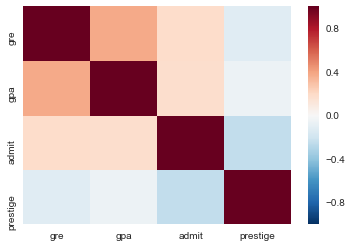

In [28]:

correlations = df[['gre', 'gpa', 'admit','prestige']].corr()
print(correlations)
print(sns.heatmap(correlations))

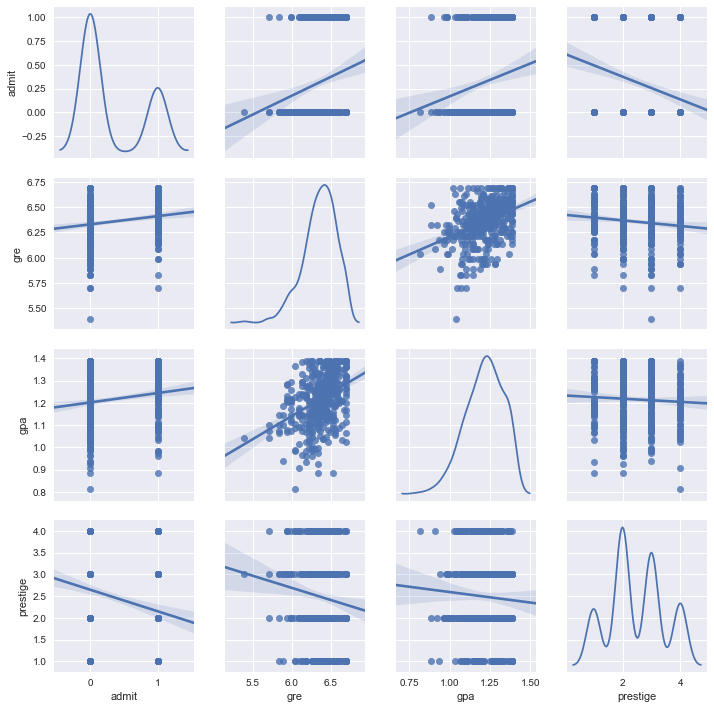

In [22]:

sns.pairplot(log_df[['admit', 'gre','gpa', 'prestige']], 
             diag_kind = 'kde', kind = 'reg');


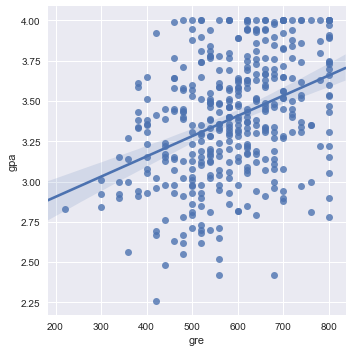

In [27]:
sns.lmplot('gre', 'gpa', log_df)


#### Question 12. What did you find?

Answer: There is some colinearity between GRE and GPA, but it is not strong enough to necessitate removing one from the model

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Test the correlation between admission and prestige, plot a scatter chart 

In [36]:
df[['admit','prestige']].corr()

,admit,prestige
admit,1.000000,-0.243563
prestige,-0.243563,1.000000


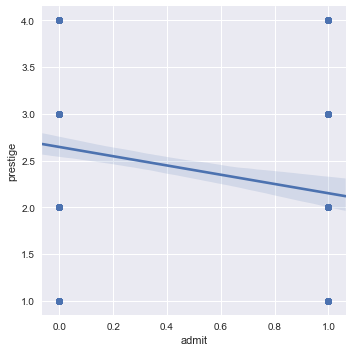

In [37]:
sns.lmplot('admit', 'prestige', df)

#### Question 14. What is your hypothesis? 

Answer: Hypothesis is that as GRE, GPA and prestige increase, the likelihood of admission increases. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data